In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import e

Reference: Haroun, Y., Legendre, D., & Raynal, L. (2010). Volume of fluid method for interfacial reactive mass transfer: Application to stable liquid film. Chemical Engineering Science, 65(10), 2896-2909.

# Haroun Figure 1a

In [2]:
cfd= pd.read_csv('../data/Haroun_2010/Haroun_2020_Fig1_data_He01.csv')

In [3]:
# normalized concentration

cfd['C_normalized']= (cfd['C']- 0.5)/(1-0.5)
cfd['y_normalized']= cfd['Points:1']/(0.5)

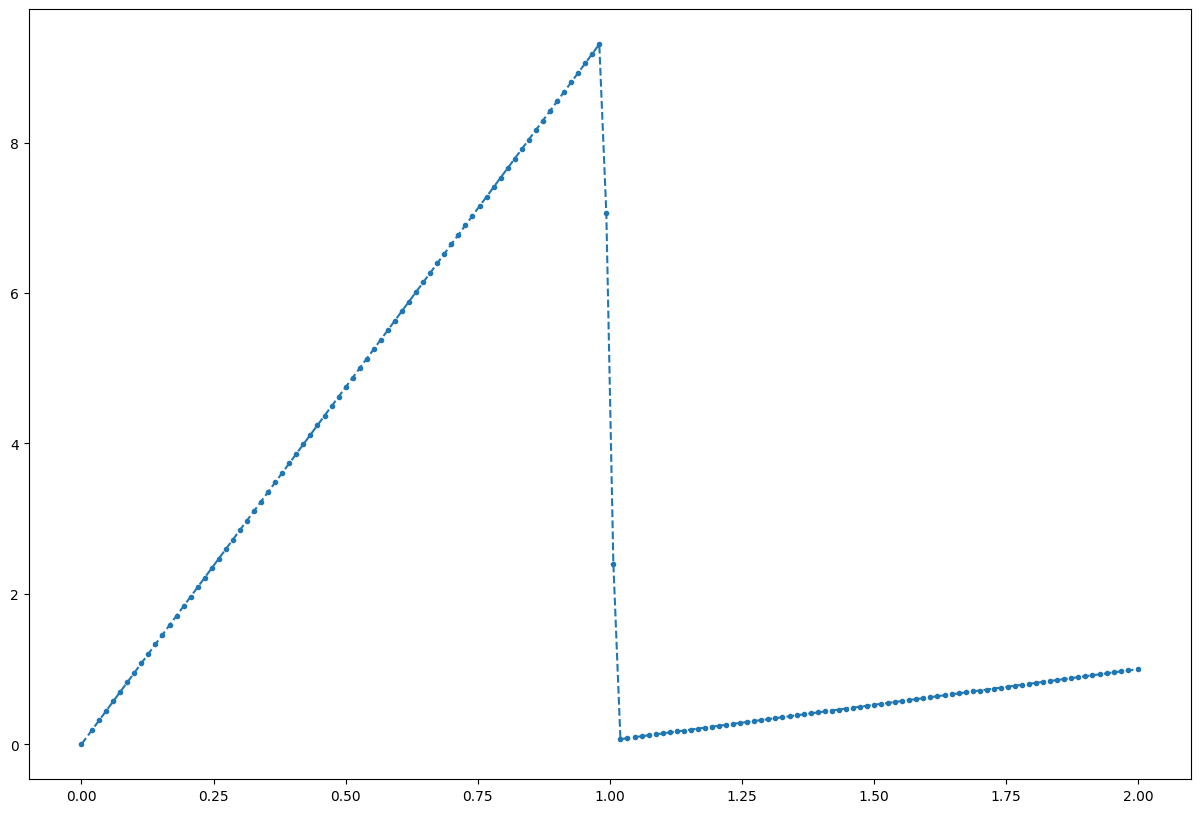

In [4]:
# normalized data for comparison with Haroun et al. (2010)
fig2 = plt.figure(figsize=(15, 10))
ax = fig2.add_subplot()
ax.plot(cfd['y_normalized'], cfd['C_normalized'], marker ='o', ms=3 ,label='scalarIncompressibleVoF', linestyle='--')

#fig2.savefig("Haroun_2010-2.png", dpi=300)

plt.show()

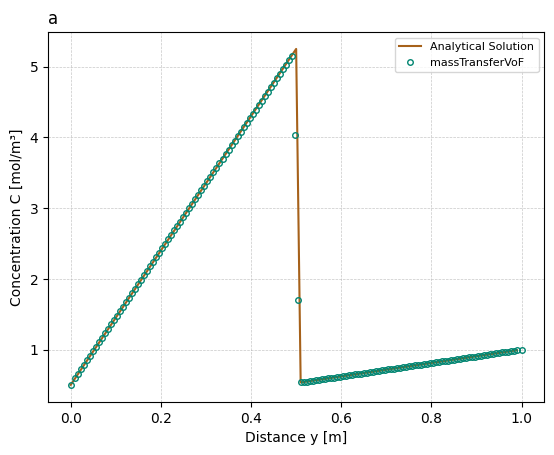

In [5]:
# analytical solution
def p_funk(x):
    if x <= 0.5:
        return (1.0 - 0.1 * 0.5) / (0.1 + 1e-6 / 1e-5) * x / 0.5 + 0.5
    else:
        return (1.0 - 0.1 * 0.5) / (0.1 * 1e-5 / 1e-6 + 1) * (x - 1) / 0.5 + 1.0

x_series = np.arange(0, 1, .01)
y_series = np.vectorize(p_funk)(x_series)

# create plot

plt.figure()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# plot analytical solution
plt.plot(x_series, y_series, label='Analytical Solution', color='#a6611a')


# plot CSV-files 
plt.plot(cfd['Points:1'], cfd['C'], 'o', label='massTransferVoF', markersize=4, markeredgecolor='#018571', markerfacecolor='None', linestyle='None')  

#plt.title('He=0.1')
plt.title('a', loc='left')
plt.xlabel('Distance y [m]')
plt.ylabel('Concentration C [mol/m³]')
plt.legend(loc='upper right', prop={'size': 8})
plt.savefig("../figures/Haroun_2010_fig1.png", dpi=300)
plt.show()

# Haroun 2010, Test 1 (no figure), He=10

In [6]:
cfd_He10= pd.read_csv('../data/Haroun_2010/Haroun_2020_Fig1_data_He10.csv')

In [7]:
# normalized concentration

cfd_He10['C_normalized']= (cfd_He10['C']- 0.5)/(1-0.5)
cfd_He10['y_normalized']= cfd_He10['Points:1']/(0.5)

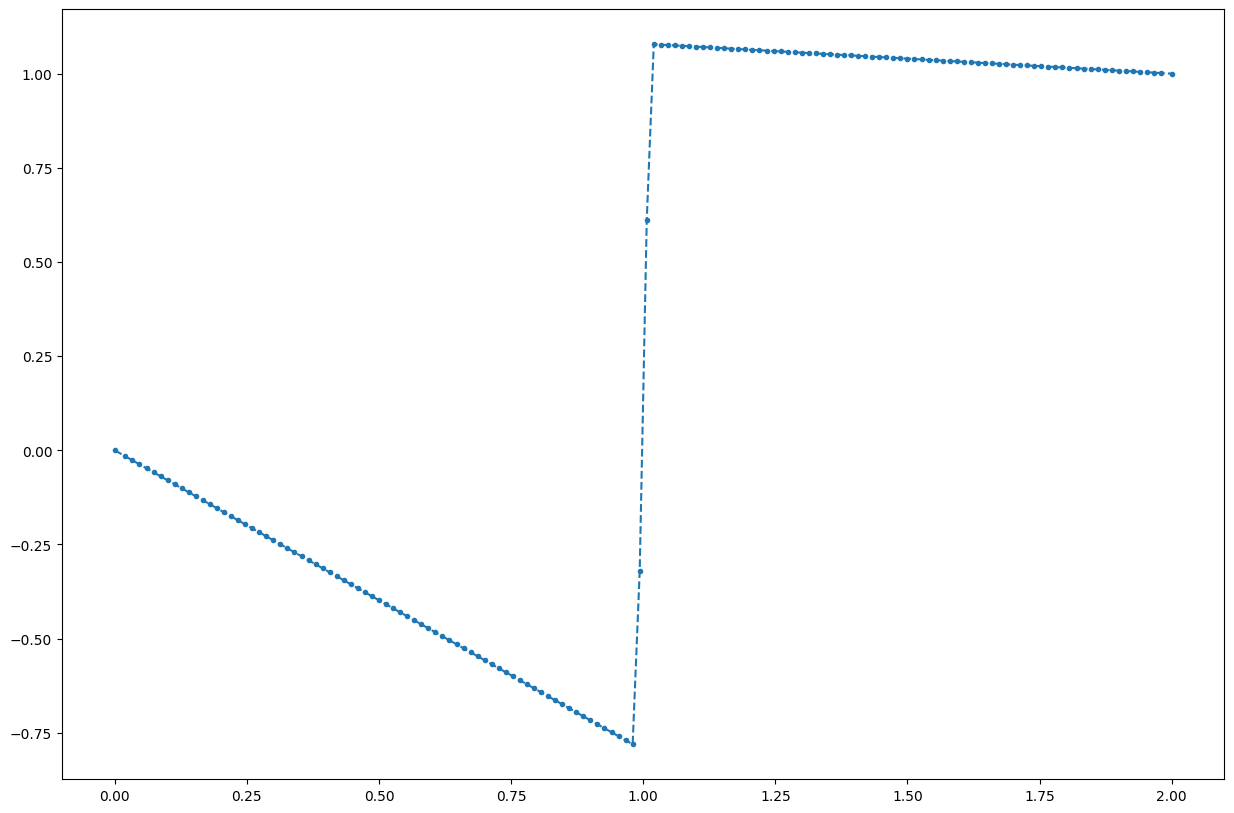

In [8]:
# normalized data for comparison with Haroun et al. (2010)
fig2 = plt.figure(figsize=(15, 10))
ax = fig2.add_subplot()
ax.plot(cfd_He10['y_normalized'], cfd_He10['C_normalized'], marker ='o', ms=3 ,label='scalarIncompressibleVoF', linestyle='--')

#fig2.savefig("Haroun_2010-2_He10.png", dpi=300)

plt.show()

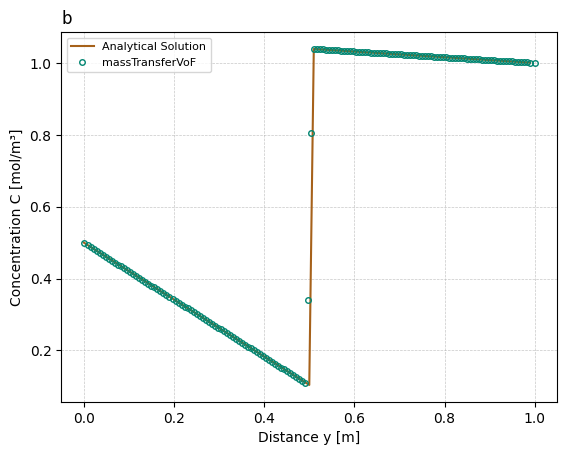

In [9]:
# Analytische Lösung
def p_funk(x):
    if x <= 0.5:
        return (1.0 - 10 * 0.5) / (10 + 1e-6 / 1e-5) * x / 0.5 + 0.5
    else:
        return (1.0 - 10 * 0.5) / (10 * 1e-5 / 1e-6 + 1) * (x - 1) / 0.5 + 1.0

x_series = np.arange(0, 1, .01)
y_series = np.vectorize(p_funk)(x_series)

# Plot

plt.figure()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Plot der analytischen Lösung
plt.plot(x_series, y_series, label='Analytical Solution', color='#a6611a')


# Plot der CSV-Daten (als Punkte oder Linie)
plt.plot(cfd_He10['Points:1'], cfd_He10['C'], 'o', label='massTransferVoF', markersize=4, markeredgecolor='#018571', markerfacecolor='None', linestyle='None')  # 'o' = Punkte

#plt.title('He=10')
plt.title('b', loc='left')
plt.xlabel('Distance y [m]')
plt.ylabel('Concentration C [mol/m³]')
plt.legend(loc='upper left', prop={'size': 8})
plt.savefig("../figures/Haroun_2010_fig1_He10.png", dpi=300)
plt.show()

# H2S at different temperatures (298.15 and 293.15K)

In [10]:
cfd_H2S_298= pd.read_csv('../data/Haroun_2010/Haroun_2020_Fig1_data_H2S.csv')
cfd_H2S_293= pd.read_csv('../data/Haroun_2010/Haroun_2020_Fig1_data_H2S_293K.csv')


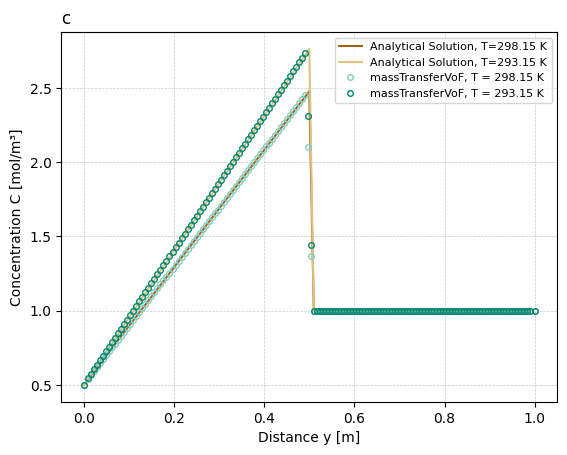

In [11]:
# Analytische Lösung
def p_funk_h2s(x, Temp):
    He_Temp = 1/(1e-3 * e**(2200.0*(1/Temp-1/298.15)) * 8.314 * Temp)
    
    if x <= 0.5:
        return (1.0 - He_Temp * 0.5) / (He_Temp + 1.4e-9 / 1.5e-5) * x / 0.5 + 0.5
    else:
        return (1.0 - He_Temp * 0.5) / (He_Temp * 1.5e-5/1.4e-9  + 1) * (x - 1) / 0.5 + 1.0

x_series = np.arange(0, 1, .01)
y_series_298 = np.vectorize(p_funk_h2s)(x_series, 298.15)
y_series_293 = np.vectorize(p_funk_h2s)(x_series, 293.15)


# Plot
plt.figure()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Plot der analytischen Lösung
plt.plot(x_series, y_series_298, label='Analytical Solution, T=298.15 K', color='#a6611a', linewidth=1.5)
plt.plot(x_series, y_series_293, label='Analytical Solution, T=293.15 K', color='#dfc27d', linewidth=1.5)



# Plot der CSV-Daten (als Punkte oder Linie)
plt.plot(cfd_H2S_298['Points:1'], cfd_H2S_298['C'], 'o', label='massTransferVoF, T = 298.15 K', markersize=4, markeredgecolor='#80cdc1', markerfacecolor='None', linestyle='None')  # 'o' = Punkte
plt.plot(cfd_H2S_293['Points:1'], cfd_H2S_293['C'], 'o', label='massTransferVoF, T = 293.15 K', markersize=4, markeredgecolor='#018571', markerfacecolor='None', linestyle='None')  # 'o' = Punkte


#plt.title('He=10')
plt.title('c', loc='left')
plt.xlabel('Distance y [m]')
plt.ylabel('Concentration C [mol/m³]')
plt.legend(loc='upper right', prop={'size': 8})
plt.savefig("../figures/Haroun_2010_fig1_H2S_temps.png", dpi=300)
plt.show()

# O2 (298.15K)

In [12]:
cfd_O2= pd.read_csv('../data/Haroun_2010/Haroun_2020_Fig1_data_O2.csv')

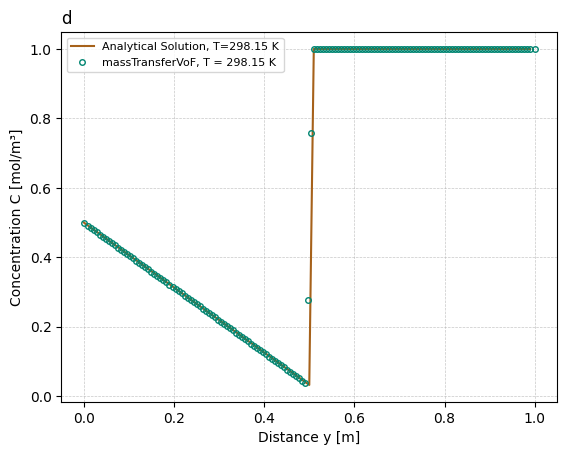

In [13]:
def p_funk(x, Temp):
    He_Temp = 1/(1.3e-5 * e**(1700.0*(1/Temp-1/298.15)) * 8.314 * Temp)
    
    if x <= 0.5:
        return (1.0 - He_Temp * 0.5) / (He_Temp + 1.4e-9 / 1.5e-5) * x / 0.5 + 0.5
    else:
        return (1.0 - He_Temp * 0.5) / (He_Temp * 1.5e-5/1.4e-9 + 1) * (x - 1) / 0.5 + 1.0

x_series_O2 = np.arange(0, 1, .01)
y_series_O2 = np.vectorize(p_funk)(x_series, 298.15)


# Plot

plt.figure()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Plot der analytischen Lösung
plt.plot(x_series_O2, y_series_O2, label='Analytical Solution, T=298.15 K', color='#a6611a', linewidth=1.5)

# Plot der CSV-Daten (als Punkte oder Linie)
plt.plot(cfd_O2['Points:1'], cfd_O2['C'], 'o', label='massTransferVoF, T = 298.15 K', markersize=4, markeredgecolor='#018571', markerfacecolor='None', linestyle='None')  # 'o' = Punkte

#plt.title('He=10')
plt.title('d', loc='left')
plt.xlabel('Distance y [m]')
plt.ylabel('Concentration C [mol/m³]')
plt.legend(loc='upper left', prop={'size': 8})
plt.savefig("../figures/Haroun_2010_fig1_O2.png", dpi=300)
plt.show()